<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumores (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [17]:
# Revisamos si hay datos NaN
df.isna().all().unique()

array([False])

Como nuestro dataset es un conjunto Supervisado, lo separaremos en dos conjuntos, el de atributos y características y el de etiqueta.

In [21]:
X = df.loc[:, df.columns[2:]].values
y = df.loc[:, ['diagnosis']].values

#Normalizamos con StandarScaler
X = StandardScaler().fit_transform(X)

Una vez aplicada la normalización de los datos, realizamos un exploratorio sobre la correlación entre los predictores.

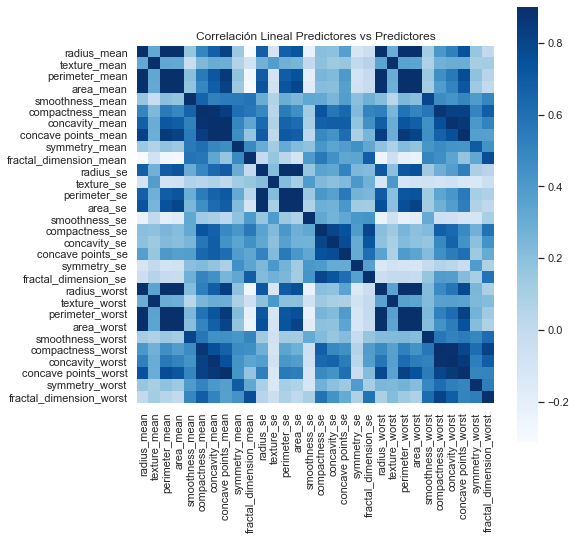

In [22]:
predictor_names = df.columns[2:]
n_show = min(len(predictor_names),50)

corrmat = df[predictor_names[:n_show]].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.9, square=True, ax=ax,cmap="Blues")
ax.set_title("Correlación Lineal Predictores vs Predictores")
plt.show()

Como se puede ver en las esquinas inferior izquierda y superior derecha, hay zonas más oscuras que indican una correlación mayor entre los datos. Esta correlación lineal puede afectar nuestro entrenamiento, ya que queremos que los datos sean lo más linealmente independientes posible. A continuación, realizaremos una reducción de dimensionalidad utilizando componentes principales.

In [24]:
pca = pca = PCA(n_components=10) # modelo
principalComponents = pca.fit_transform(X) # componentes obtenidas ajustando el modelo a los datos.

Observaremos este ajuste por componentes viendo los gráficos de varianza y varianza acumulada:

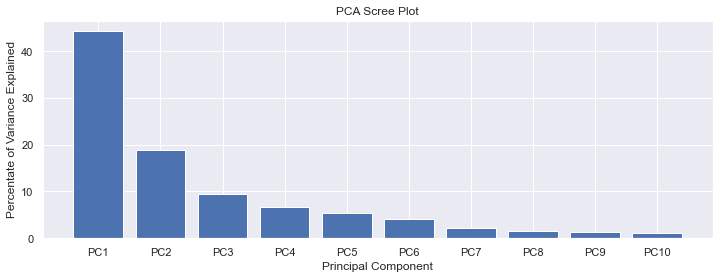

In [25]:
# grafico varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

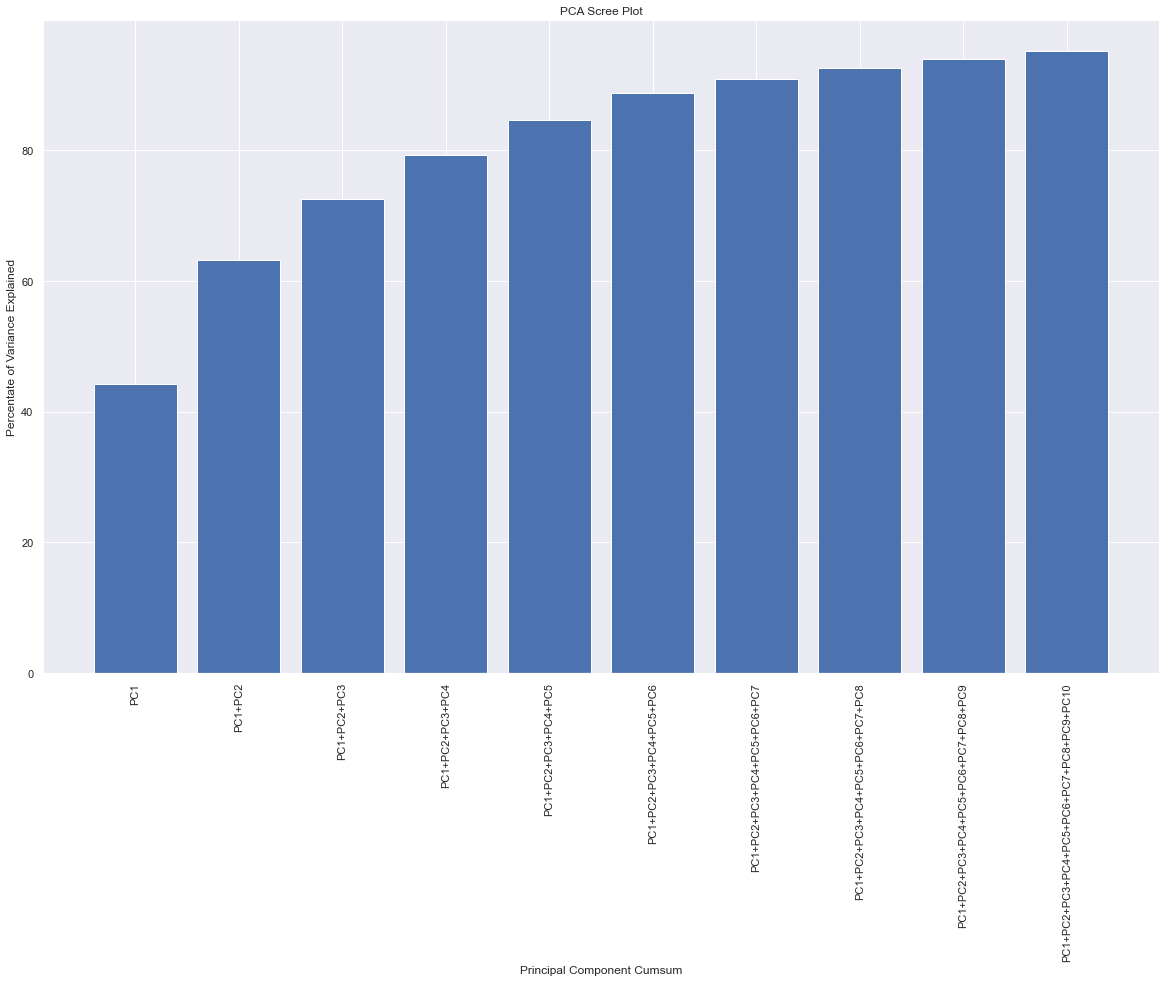

In [36]:
# grafico varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 
           'PC1+PC2', 
           'PC1+PC2+PC3', 
           'PC1+PC2+PC3+PC4', 
           'PC1+PC2+PC3+PC4+PC5', 
           'PC1+PC2+PC3+PC4+PC5+PC6',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',
           'PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10']

plt.figure(figsize=(20,12))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.xticks(x= range(1,11), rotation='vertical')
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

In [37]:
percent_variance_cum

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15])

El ajuste anterior nos indica que la varianza de las variables se puede explicar en 95.15% considerando solo las diez componentes principales (PC1, ... , PC10). Veamos cuáles son esas componentes:

In [49]:
principalDataframe = pd.DataFrame(data = principalComponents, 
                                  columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
targetDataframe = df[['diagnosis']]

df_red = pd.concat([principalDataframe, targetDataframe],axis = 1)
df_red.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369,-0.398409,-0.157125,-0.877399,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013359,0.240989,-0.711902,1.106993,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097372,0.024064,0.454283,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429910,1.059564,-1.405441,-1.116970,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636377,-0.263807,0.377698,1


Hemos reducido la dimensionalidad del conjunto de atributos a través del análisis de componentes principales. Ahora sobre el dataset obtenido a través de la reducción emplearemos tres modelos de clasificación y veremos sus métricas para evaluar su ajuste al fenómeno que estamos estudiando.